## Introduction :

In this report I have done a detailed analysis below showing the metrics like when do the people start purchasing the product, how much revenue does each user bring to the company , how long it takes for the investment to payoff and so on.. based on the  these metrics we can decide which sources and cohorts to invest in for better business.

## Extracting data for analysis :

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
# creating a new dataframe
visits_log = pd.read_csv('/datasets/visits_log_us.csv')
visits_log.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [3]:
# checking for general info and memory usage
visits_log.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 79.3 MB


In [4]:
# checking for missing values
visits_log.isna().sum()

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

In [5]:
# checking for duplicates
visits_log.duplicated().sum()

0

In [6]:
orders_log = pd.read_csv('/datasets/orders_log_us.csv')
orders_log.head(10)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [7]:
# checking for general info and memory usage
orders_log.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.4 MB


In [8]:
# checking for missing values
orders_log.isna().sum()

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

In [9]:
# checking for duplicates
orders_log.duplicated().sum()

0

In [10]:
costs = pd.read_csv('/datasets/costs_us.csv')
costs.head(10)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


In [11]:
# checking for general info and memory usage
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.2 KB


In [12]:
# checking for missing values
costs.isna().sum()

source_id    0
dt           0
costs        0
dtype: int64

In [13]:
# checking for duplicates
costs.duplicated().sum()

0

### conclusion :

We have extracted three data sets for analysis which are named as visits_log , orders_log and costs.

Let's get a brief idea of these dataframes below:

VISITS_LOG -
    
   1. This dataframe has 359400 rows × 5 columns 
   2. The columns in it have appropriate data types for each except for the End Ts, Start Ts which are supposed to be changed.
   3. There seems to be no missing values and duplicates in it

ORDERS_LOG -
    
   1. This dataframe has 50415 rows × 3 columns
   2. The columns in it have appropriate data types for each except for the Buy Ts which is to be changed.
   3. There seems to be no missing values and duplicates in it

COSTS -
    
   1. This dataframe has 2542 rows × 3 columns
   2. The columns in it have appropriate data types for each except for dt which is to be changed.
   3. There seems to be no missing values and duplicates in it



## Optimizing the data:

In [14]:
# converting the column names into lower case
visits_log.columns = visits_log.columns.str.lower()
orders_log.columns = orders_log.columns.str.lower()
visits_log.rename(columns=({'source id':'source_id'}),inplace=True)

In [15]:
# changing data type to datetime
visits_log['end ts'] = pd.to_datetime(visits_log['end ts'],infer_datetime_format=True)
visits_log['start ts'] = pd.to_datetime(visits_log['start ts'],infer_datetime_format=True)
orders_log['buy ts'] = pd.to_datetime(orders_log['buy ts'],infer_datetime_format=True)
costs['dt'] = pd.to_datetime(costs['dt'],infer_datetime_format=True)

In [16]:
visits_log.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 32.7 MB


In [17]:
orders_log.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [18]:
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [19]:
visits_log['device'].value_counts()

desktop    262567
touch       96833
Name: device, dtype: int64

In [20]:
visits_log['device'] = visits_log['device'].astype('category')

In [21]:
visits_log.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null category
end ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


### Conclusion:

The data has been optimized as follows:

1. The visits_log table has been reduced from a memory usage of 79.3MB to 11.3MB by changing the datatype of end ts,start ts to datetime64 and device to category as there are two devices that were been used.

2. The orders_log table has been reduced from a memory usage of  4.4MB to 1.2MB by changing the datatype of buy ts to datetime64.

3. The costs table has been reduced from a memory usage of 206.2 KB to 59.7 KB by changing the datatype of dt to datetime64.


## Calculating metrics and making reports :

In [22]:
# splitting the date into required metrics

visits_log['date'] = visits_log['start ts'].dt.date
visits_log['week'] = visits_log['start ts'].astype('datetime64[W]')
visits_log['month'] = visits_log['start ts'].astype('datetime64[M]')
visits_log['year'] = visits_log['start ts'].astype('datetime64[Y]')
visits_log.head(10)

,device,end ts,source_id,start ts,uid,date,week,month,year
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,2017-01-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,2018-01-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,2017-01-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,2018-01-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01,2017-01-01
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-03,2017-08-31,2017-09-01,2017-01-01
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018-01-30,2018-01-25,2018-01-01,2018-01-01
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312,2017-11-05,2017-11-02,2017-11-01,2017-01-01
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644,2017-07-19,2017-07-13,2017-07-01,2017-01-01
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063,2017-11-08,2017-11-02,2017-11-01,2017-01-01


### DAU:

In [23]:
# grouping date to get number of unique users
dau_total = visits_log.groupby('date').agg({'uid':['nunique']})
dau_total.columns = ['unique_users']


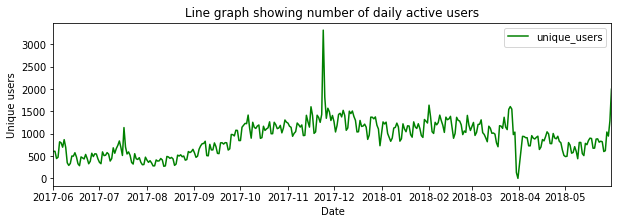

In [24]:
# plotting graph showing number of daily active users
dau_total.plot(figsize=(10,3),color='green')
plt.xlabel('Date')
plt.ylabel('Unique users')
plt.title('Line graph showing number of daily active users')
plt.legend();

In [25]:
avg_dau_total = visits_log.groupby('date').agg({'uid':['nunique']}).mean()
avg_dau_total

uid  nunique    907.991758
dtype: float64

From the above graph we can see that highest number of users were reported in 2017 between November and December months. This may be due to Black Friday deals going on during that period or any other clearence sales. 

There was an unusual drop in 2018 in the beginning of April month that may be due to the server crash or any other technical issues. Other than these two variations the daily active users seem to as expected.

On an average almost 910 users visits the website on a daily basis.

### WAU .:

In [26]:
# grouping by week to get number of weekly active users
wau_total = visits_log.groupby('week').agg({'uid':'nunique'})
wau_total.head(10)

,uid
week,
2017-06-01,4082
2017-06-08,3311
2017-06-15,2844
2017-06-22,3079
2017-06-29,3055
2017-07-06,3563
2017-07-13,4790
2017-07-20,2978
2017-07-27,2505


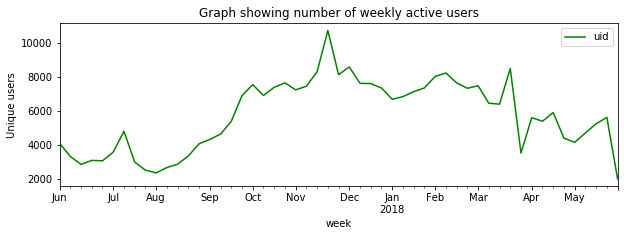

In [27]:
# plotting graphto get number of weekly active users
wau_total.plot(figsize=(10,3),color='green')
plt.xlabel('week')
plt.ylabel('Unique users')
plt.title('Graph showing number of weekly active users')
plt.legend();


In [28]:
avg_wau_total = visits_log.groupby('week').agg({'uid':'nunique'}).mean()
avg_wau_total

uid    5724.415094
dtype: float64

The above graph depicts almost similar results as that of the daily active users, where the highest number of weekly users were reported in almost 3rd week of November and 2nd week of March. There were few considerably low users in the month of August and  4th week of March. 

On an average the the number of weekly active users were reported to be about 5724.

### MAU :

In [29]:
# creating a dataframe showing total number of users per month
mau_total = visits_log.groupby(['month']).agg({'uid':'nunique'})
mau_total

,uid
month,
2017-06-01,13259
2017-07-01,14183
2017-08-01,11631
2017-09-01,18975
2017-10-01,29692
2017-11-01,32797
2017-12-01,31557
2018-01-01,28716
2018-02-01,28749


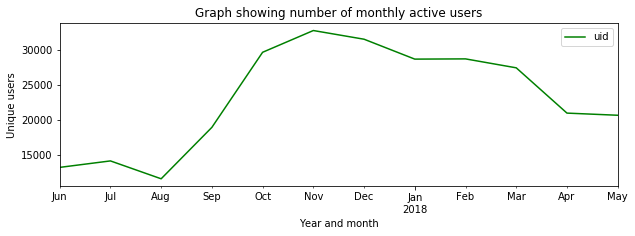

In [30]:
# plotting graph to show monthly active users
mau_total.plot(figsize=(10,3),color='green')
plt.xlabel('Year and month')
plt.ylabel('Unique users')
plt.title('Graph showing number of monthly active users')
plt.legend();


In [31]:
avg_mau_total = visits_log.groupby(['year','month']).agg({'uid':'nunique'}).mean()
avg_mau_total

uid    23228.416667
dtype: float64

From the above graph we can observe that in 2017 the sales have dropped from July to August to it's minimum extent then due some remarkable change the users visits have sky rocketed to it's maximum in the month of November there by succeeding in getting users attention till April 2018.

On an average almost 23228 monthly active users were reported on the website, this may be highly impacted due to the sales from October to January.

### Sessions per day:

In [32]:
# creating dataframe to get total sessions per day
sessions_per_day = visits_log.groupby('date').agg({'uid':'count'})
sessions_per_day.columns = ['n_sessions']
sessions_per_day.head(10)

,n_sessions
date,
2017-06-01,664
2017-06-02,658
2017-06-03,477
2017-06-04,510
2017-06-05,893
2017-06-06,875
2017-06-07,788
2017-06-08,939
2017-06-09,755


In [33]:
# calculating average numberof sessions per day
avg_sessions_per_day = visits_log.groupby(['date']).agg({'uid':'count'}).mean()
avg_sessions_per_day

uid    987.362637
dtype: float64

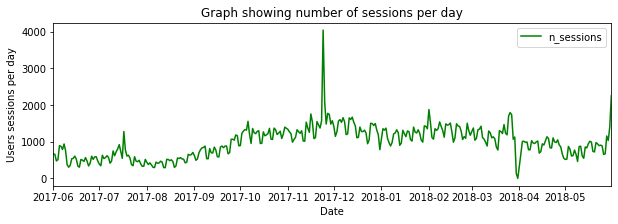

In [34]:
# plotting number of sessions per day
sessions_per_day.plot(figsize=(10,3),color='green')
plt.xlabel('Date')
plt.ylabel('Users sessions per day')
plt.title('Graph showing number of sessions per day')
plt.legend()

plt.show()


We have already seen the dail active users graph above this graph is pretty much similar to it. Thr total number of sessions range from 700 to about 4000 per day. However the highest peak is limited to only few days in November. The lowest peak being at almost 0 which clearly represents some sort of technical issue in the network or server.

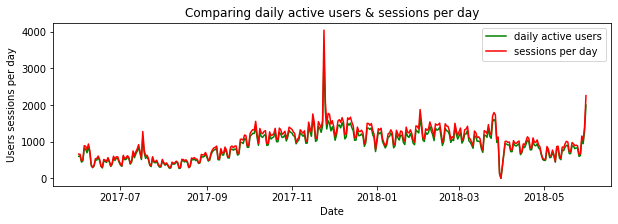

In [35]:
# plotting line chart showing daily active users and total sessions per day
plt.figure(figsize=(10,3))

line_chart1 = plt.plot(dau_total, color='green')
line_chart2 = plt.plot(sessions_per_day, color='Red')
plt.xlabel('Date')
plt.ylabel('Users sessions per day')
plt.title('Comparing daily active users & sessions per day')
plt.legend(['daily active users', 'sessions per day'])

plt.show()


The above comparision of daily active users and sessions per day clearly show that each user has made almost 1 to 1.1 sessions per day to the max. which may be due to the fact that people just open the site to check the products and buy it.

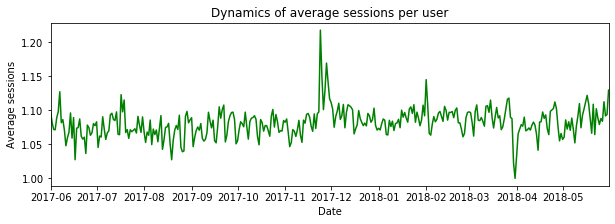

In [36]:
# plotting graph showing average number of sessions per day
avg_sess_per_user = sessions_per_day['n_sessions'] / dau_total['unique_users']
avg_sess_per_user.plot(figsize=(10,3),color='green')
plt.title('Dynamics of average sessions per user')
plt.xlabel('Date')
plt.ylabel('Average sessions');

On an average the number of sessions per user usually range from 1.03 to 1.15 per day. The highest and lowest peaks being almost 1.25 and 1.00 respectively.

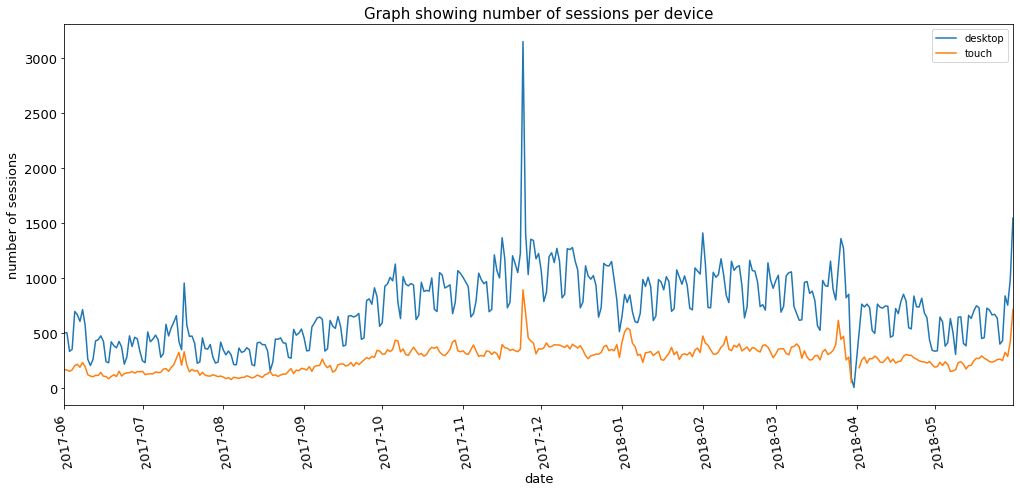

In [37]:
# plotting a graph showing number of sessions on desktop and touch versions per date
plot = visits_log.pivot_table(index='date',columns='device',values='uid',aggfunc='count').plot.line(rot=100,figsize=(17,7),fontsize=13)
plot.set_alpha(0.8)
plot.set_title('Graph showing number of sessions per device',fontsize=15)
plot.set_xlabel('date',fontsize=13)
plot.legend()
plot.set_ylabel('number of sessions',fontsize=13);

Most of the users visit or order from the desktop rather than the touch devices like mobile phones or any other devices .. This may be because they can see the things more clearly on the desktop and ma be the desktop version is much better than other mobile version.

### Length of each session:

In [38]:
# calculating length of session
visits_log['sess_length'] = ((visits_log['end ts'] - visits_log['start ts'])/np.timedelta64(1,'m')).round()
visits_log.head(10)


,device,end ts,source_id,start ts,uid,date,week,month,year,sess_length
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,2017-01-01,18.0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,2018-01-01,28.0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,2017-01-01,0.0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,2018-01-01,24.0
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01,2017-01-01,0.0
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-03,2017-08-31,2017-09-01,2017-01-01,1.0
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018-01-30,2018-01-25,2018-01-01,2018-01-01,56.0
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312,2017-11-05,2017-11-02,2017-11-01,2017-01-01,1.0
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644,2017-07-19,2017-07-13,2017-07-01,2017-01-01,3.0
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063,2017-11-08,2017-11-02,2017-11-01,2017-01-01,1.0


### Average length of each session:

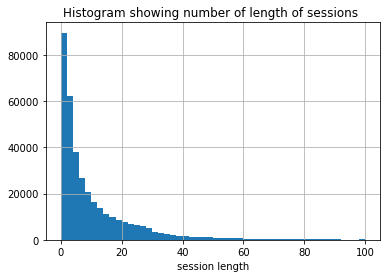

In [39]:
# plotting histogram showing length of sessions
visits_log['sess_length'].hist(bins=50,range=(0,100))
plt.title('Histogram showing number of length of sessions ')
plt.xlabel('session length');

In [40]:
session_length = visits_log['sess_length'].mode()
session_length

0    1.0
dtype: float64

The Average Length of the session is about 1 min which seems to be pretty much reasonable because not every one likes to invest their time in just booking a ticket online.

From the above graph representing the session lengths it is pretty clear that distribution is highly skewed so I chose the average metric to be mode in order to determine the Average Session Length (ASL).

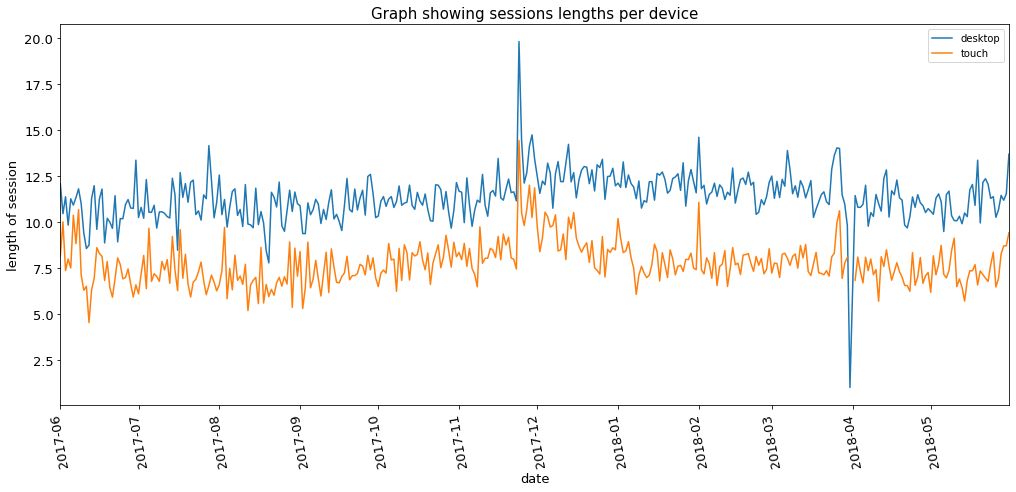

In [41]:
# creating pivot table to get average session lengths per device per date
plot = visits_log.pivot_table(index='date',columns='device',values='sess_length').plot.line(rot=100,figsize=(17,7),fontsize=13)

plot.set_alpha(0.8)
plot.set_title('Graph showing sessions lengths per device',fontsize=15)
plot.set_xlabel('date',fontsize=13)
plot.legend()
plot.set_ylabel('length of session',fontsize=13);

From the above graph we can clearly say that users access the site mostly on desktop rather than touch screen devices. 

Both these platforms had peaks between November and December as expected.

Where as the highest drop was in April 2019 only on the desktop which clearly indicates that there was some technical issue with the desktop version not on the mobile version.

The maximum session length were recorded with the users operating on desktop version rather than any other compact version like mobile version which allows users to stick to the sites for a longer time on desktop.

### Retention rate:

In [42]:
# calculating first visit date from the date of visits_log
first_login_date = visits_log.groupby(['uid'])['date'].min()
first_login_date.name = 'first_login_date'
visits_log = visits_log.join(first_login_date,on='uid')


In [43]:
# converting date to month type
visits_log['first_login_month'] = visits_log['first_login_date'].astype('datetime64[M]')
visits_log['login_month'] = visits_log['date'].astype('datetime64[M]')
# creating monthly cohort to check when the user logged in first 
visits_log['cohort_lifetime'] = (visits_log['login_month'] - visits_log['first_login_month'])
visits_log['cohort_lifetime'] = visits_log['cohort_lifetime']/ np.timedelta64(1, 'M')
visits_log['cohort_lifetime'] = visits_log['cohort_lifetime'].round().astype(int)

In [44]:
# creating pivot table to calculate total users in different cohorts
visits_log.pivot_table(
    index='first_login_month',
    columns='login_month',
    values='uid',
    aggfunc='nunique',
)


 

login_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
first_login_month,,,,,,,,,,,,
2017-06-01,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07-01,NaN,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0
2017-08-01,NaN,NaN,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0
2017-09-01,NaN,NaN,NaN,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0
2017-10-01,NaN,NaN,NaN,NaN,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0
2017-11-01,NaN,NaN,NaN,NaN,NaN,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,25268.0,1410.0,960.0,786.0,512.0,481.0
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22624.0,1351.0,890.0,565.0,458.0
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22197.0,1267.0,565.0,446.0


In [45]:
# creating a dataframe showing cohort lifetime and total users
cohorts = (visits_log
            .groupby(['first_login_month', 'cohort_lifetime'])
            .agg({'uid': 'nunique'})
            .reset_index()
          )
print(cohorts.head(10))

  first_login_month  cohort_lifetime    uid
0        2017-06-01                0  13259
1        2017-06-01                1   1043
2        2017-06-01                2    713
3        2017-06-01                3    814
4        2017-06-01                4    909
5        2017-06-01                5    947
6        2017-06-01                6    809
7        2017-06-01                7    766
8        2017-06-01                8    694
9        2017-06-01                9    674


In [46]:
# to check for the users who had a lifetime of '0'
initial_users_count = cohorts[cohorts['cohort_lifetime']==0][['first_login_month','uid']]
initial_users_count = initial_users_count.rename(columns={'uid': 'cohort_users'})

# calculating retention for the corresponding cohorts
cohorts = cohorts.merge(initial_users_count,on='first_login_month')
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']
retention_pivot = cohorts.pivot_table(index='first_login_month',columns='cohort_lifetime',values='retention',aggfunc='sum')
retention_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_login_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


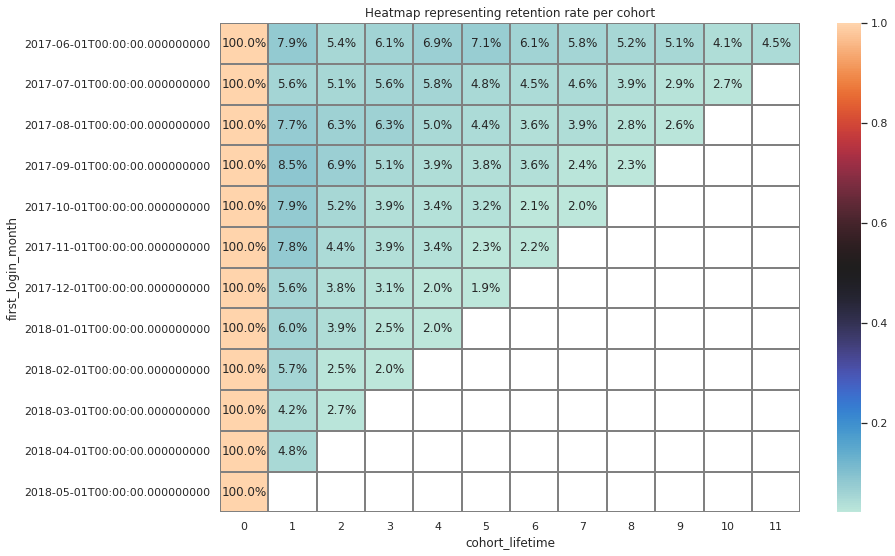

In [47]:
# plotting retention rates on a heatmap
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Heatmap representing retention rate per cohort')
sns.heatmap(retention_pivot,cmap="icefire",annot=True, fmt='.1%', linewidths=1, linecolor='gray',robust=True); 

From the above table we can see that mostly out of 100% only 7 to 8% of the users return back during 4 week duration. 

There is not much change in the retention rate as we can see it hardly varies from 4 - 8 % in the first month.

#### Conclusion :

After completing the product analysis we saw that on an average there are about 907 daily active users with almost 987 sessions per day which means that each user makes 1 - 1.5 sessions every day on the website. 

The Average session length is about 1 minute which seems to be pretty reasonable if the user know which tickets to book for the event and corresponding time as per one's schedule.

We observed that maximum number of users and highest session lengths were reported in November month which may be due to the fact that users were so much attracted towards the Black Friday sales an wanted to grab all of the tickets so that they can enjoy during the christmas vacation time.

### Conversion :

In [48]:
# calculating metrics for the time the order was placed
orders_log['order_date'] = (orders_log['buy ts']).dt.date
orders_log['order_week'] = (orders_log['buy ts']).dt.week
orders_log['order_month'] = (orders_log['buy ts']).astype('datetime64[M]')
orders_log.head(10)

,buy ts,revenue,uid,order_date,order_week,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,22,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,22,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,22,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,22,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,22,2017-06-01
...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31,22,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31,22,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31,22,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,22,2018-05-01


In [49]:
# calculating the first order date of user
first_order = orders_log.groupby('uid')['order_date'].min().reset_index()
first_order.head(10)


,uid,order_date
0,313578113262317,2018-01-03
1,1575281904278712,2017-06-03
2,2429014661409475,2017-10-11
3,2464366381792757,2018-01-28
4,2551852515556206,2017-11-24
...,...,...
36518,18445147675727495770,2017-11-24
36519,18445407535914413204,2017-09-22
36520,18445601152732270159,2018-03-26
36521,18446156210226471712,2018-02-18


In [50]:
first_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36523 entries, 0 to 36522
Data columns (total 2 columns):
uid           36523 non-null uint64
order_date    36523 non-null object
dtypes: object(1), uint64(1)
memory usage: 570.8+ KB


In [51]:
# getting the first login date of user
first_login_date = first_login_date.reset_index()
first_login_date.head(10)

,uid,first_login_date
0,11863502262781,2018-03-01
1,49537067089222,2018-02-06
2,297729379853735,2017-06-07
3,313578113262317,2017-09-18
4,325320750514679,2017-09-30
...,...,...
228164,18446403737806311543,2017-11-30
228165,18446424184725333426,2017-12-06
228166,18446556406699109058,2018-01-01
228167,18446621818809592527,2017-12-27


In [52]:
first_login_date= pd.merge(first_login_date,first_order,on='uid')
first_login_date.head(10)

,uid,first_login_date,order_date
0,313578113262317,2017-09-18,2018-01-03
1,1575281904278712,2017-06-03,2017-06-03
2,2429014661409475,2017-10-11,2017-10-11
3,2464366381792757,2018-01-27,2018-01-28
4,2551852515556206,2017-11-24,2017-11-24
...,...,...,...
36518,18445147675727495770,2017-08-20,2017-11-24
36519,18445407535914413204,2017-09-22,2017-09-22
36520,18445601152732270159,2017-08-07,2018-03-26
36521,18446156210226471712,2017-11-07,2018-02-18


In [53]:
# calculating the conversion time per date
first_login_date['conversion_time']= (first_login_date['order_date'] - first_login_date['first_login_date'])
first_login_date['conversion_time'] = first_login_date['conversion_time']/ np.timedelta64(1, 'D')
first_login_date['conversion_time'] = first_login_date['conversion_time'].round()


In [54]:
first_login_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36523 entries, 0 to 36522
Data columns (total 4 columns):
uid                 36523 non-null uint64
first_login_date    36523 non-null object
order_date          36523 non-null object
conversion_time     36523 non-null float64
dtypes: float64(1), object(2), uint64(1)
memory usage: 1.4+ MB


In [55]:
first_login_date['conversion_time'].describe()

count    36523.000000
mean        16.895901
std         47.071200
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: conversion_time, dtype: float64

In [56]:
# writing a function to categorize conversion time 
def conversion_time(row):
    conversion_time = row['conversion_time']
    if conversion_time == 0:
        return '0d'
    elif conversion_time <= 7:
        return '7d'
    elif conversion_time <= 14:
        return '14d'
    elif conversion_time <= 30:
        return '30d'
    return '31+d'

In [57]:
# applying the function to the dataframe
first_login_date['conversion_time'] = first_login_date.apply(conversion_time, axis = 1)

In [58]:
first_login_date['conversion_time'].value_counts()

0d      25039
31+d     4934
7d       4297
30d      1279
14d       974
Name: conversion_time, dtype: int64

In [59]:
# categorising the conversion time in to 4 categories and finding their corresponding conversion rates
conversion_0d = first_login_date[first_login_date['conversion_time'] == '0d']['uid'].nunique() / first_login_date['uid'].nunique()*100
conversion_7d = first_login_date[first_login_date['conversion_time'] == '7d']['uid'].nunique() / first_login_date['uid'].nunique()*100
conversion_14d = first_login_date[first_login_date['conversion_time'] == '14d']['uid'].nunique() / first_login_date['uid'].nunique()*100
conversion_30d = first_login_date[first_login_date['conversion_time'] == '30d']['uid'].nunique() / first_login_date['uid'].nunique()*100

In [60]:
print('conversion_0d =',conversion_0d,'\n',
      'conversion_7d =', conversion_7d,'\n',
      'conversion_14d =', conversion_14d,'\n',
      'conversion_30d =',conversion_30d)


conversion_0d = 68.55679982476795 
 conversion_7d = 11.765189058949154 
 conversion_14d = 2.6668126933713 
 conversion_30d = 3.5019029104947563


In [61]:
first_login_date.head(10)

,uid,first_login_date,order_date,conversion_time
0,313578113262317,2017-09-18,2018-01-03,31+d
1,1575281904278712,2017-06-03,2017-06-03,0d
2,2429014661409475,2017-10-11,2017-10-11,0d
3,2464366381792757,2018-01-27,2018-01-28,7d
4,2551852515556206,2017-11-24,2017-11-24,0d
...,...,...,...,...
36518,18445147675727495770,2017-08-20,2017-11-24,31+d
36519,18445407535914413204,2017-09-22,2017-09-22,0d
36520,18445601152732270159,2017-08-07,2018-03-26,31+d
36521,18446156210226471712,2017-11-07,2018-02-18,31+d


In [62]:
conv = first_login_date.groupby('conversion_time')['uid'].nunique()

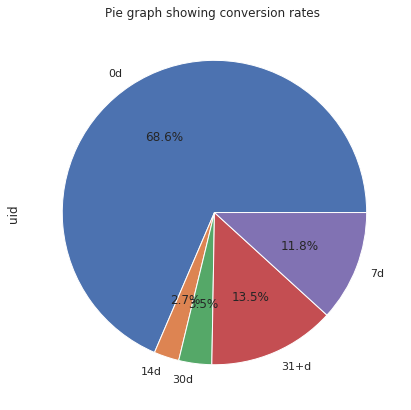

In [63]:
# plotting a pie graph showing conversion rates per category
conv.plot.pie(y='uid', 
                 autopct='%1.1f%%',
                 title='Pie graph showing conversion rates ',
                 figsize=(7,7),legend=False);

From the above graph we can see that maximum number of users have converted to depositors with in less than a week days i.e, almost 68.6% where as 13.5% people may or may not have converted back at all and vey few users ranging from 2.7 to 3.5 % were converted in 14 to 30 days.

### Orders made over a given period:

In [64]:
# grouping by the users and getting their first visit
first_visit = visits_log.groupby('uid')['first_login_date'].min()
orders_log = orders_log.merge(first_visit, on='uid', how='left')
orders_log.head(10)

,buy ts,revenue,uid,order_date,order_week,order_month,first_login_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,22,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,22,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,22,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,22,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,22,2017-06-01,2017-06-01
...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31,22,2018-05-01,2018-05-31
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31,22,2018-05-01,2018-05-31
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31,22,2018-05-01,2018-05-31
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,22,2018-05-01,2017-10-23


In [65]:
orders_log['first_login_month'] = pd.to_datetime(orders_log['first_login_date']).astype('datetime64[M]')
orders_log.head(10)

,buy ts,revenue,uid,order_date,order_week,order_month,first_login_date,first_login_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,22,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,22,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,22,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,22,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,22,2017-06-01,2017-06-01,2017-06-01
...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31,22,2018-05-01,2018-05-31,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31,22,2018-05-01,2018-05-31,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31,22,2018-05-01,2018-05-31,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,22,2018-05-01,2017-10-23,2017-10-01


In [66]:
# calculating the cohort lifetime for the users based on order month and first login month
orders_log['cohort_lifetime'] = (orders_log['order_month'] - orders_log['first_login_month'])
orders_log['cohort_lifetime'] = orders_log['cohort_lifetime']/ np.timedelta64(1, 'M')
orders_log['cohort_lifetime'] = orders_log['cohort_lifetime'].round().astype(int)
orders_log.head(10)

,buy ts,revenue,uid,order_date,order_week,order_month,first_login_date,first_login_month,cohort_lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,22,2017-06-01,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,22,2017-06-01,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,22,2017-06-01,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,22,2017-06-01,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,22,2017-06-01,2017-06-01,2017-06-01,0
...,...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31,22,2018-05-01,2018-05-31,2018-05-01,0
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31,22,2018-05-01,2018-05-31,2018-05-01,0
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31,22,2018-05-01,2018-05-31,2018-05-01,0
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,22,2018-05-01,2017-10-23,2017-10-01,7


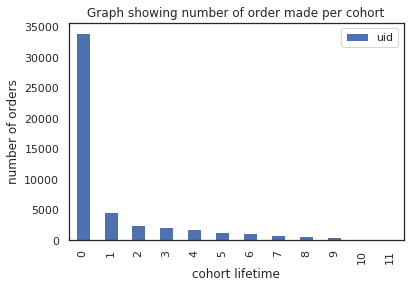

In [67]:
orders_per_cohort = orders_log.groupby(['cohort_lifetime']).agg({'uid':'count'})
orders_per_cohort.plot.bar()
plt.title('Graph showing number of order made per cohort')
plt.xlabel('cohort lifetime')
plt.ylabel('number of orders');


In [68]:
orders_per_cohort

,uid
cohort_lifetime,
0,33994
1,4605
2,2584
3,2127
4,1790
5,1414
6,1244
7,885
8,717


Here we can see that most of the orders were made during the first cohort that is with i na month of the login month which is about 33,994 orders were made . As the number of  months keep increasing the number of orders placed are gradually decreasing i.e., from almost 4600 to 300 approximately.

### Average purchase size :

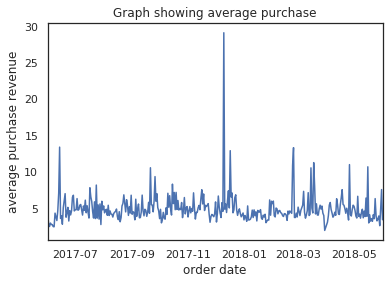

In [69]:
# calculating revenue per order date
avg_purchase = orders_log.groupby(['order_date'])['revenue'].mean()
avg_purchase.plot()
plt.title('Graph showing average purchase')
plt.xlabel('order date')
plt.ylabel('average purchase revenue');

The above graph clearly specifies that on an average revenue is between 5 to 15 irrespective of the November sales.

### LTV :

In [70]:
# calculating metrics of first orders placed
first_orders = orders_log.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
first_orders.head() 

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


In [71]:
# count the number of new customers for each month
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head() 

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [72]:
# creating a new dataframe by merging two different dataframes
orders_ = pd.merge(orders_log,first_orders, on='uid')
orders_.head() 

,buy ts,revenue,uid,order_date,order_week,order_month,first_login_date,first_login_month,cohort_lifetime,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,22,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,22,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,22,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,22,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,22,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01


In [73]:
# calculating cohorts monthly orders and getting the revenue
cohorts = orders_.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts.head() 

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [74]:
# merging cohorts and cohort_sizes
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head() 

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


LTV is calculated on the basis of gross profit rather than revenue, we need to find the gross profit by multiplying revenue by profitability (margin rate). We can't find exact margin rate (there is no data except revenue from orders and expenses for marketing), we can presume margin rate is 0.4

In [75]:
margin_rate = .4

report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report.head() 

,first_order_month,n_buyers,order_month,revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.49,3822.996,0
1,2017-06-01,2023,2017-07-01,981.82,392.728,1
2,2017-06-01,2023,2017-08-01,885.34,354.136,2
3,2017-06-01,2023,2017-09-01,1931.30,772.520,3
4,2017-06-01,2023,2017-10-01,2068.58,827.432,4


In [76]:
report['ltv'] = report['gp'] / report['n_buyers']

output = report.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='mean')

output.fillna('') 

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.889766,0.194131,0.175055,0.381869,0.409012,0.294201,0.380176,0.232637,0.221285,0.242315,0.228504,0.102742
2017-07-01,2.404087,0.134084,0.249412,0.14359,0.0707166,0.0624191,0.0480832,0.056728,0.064493,0.058858,0.0622694,
2017-08-01,2.110607,0.188797,0.183393,0.156511,0.19762,0.113416,0.0842657,0.162003,0.116885,0.0751912,,
2017-09-01,2.257812,0.447034,0.208372,1.59032,0.160223,0.258827,0.280643,0.09726,0.0736025,,,
2017-10-01,2.001493,0.214305,0.0765576,0.0628581,0.060624,0.0481447,0.0339263,0.046188,,,,
2017-11-01,2.061873,0.159693,0.0798226,0.129981,0.0592051,0.0215516,0.0459711,,,,,
2017-12-01,1.895276,0.10415,0.370039,0.42611,0.125172,0.135219,,,,,,
2018-01-01,1.654254,0.117903,0.121712,0.0571112,0.0250792,,,,,,,
2018-02-01,1.662795,0.11131,0.0314062,0.0296576,,,,,,,,


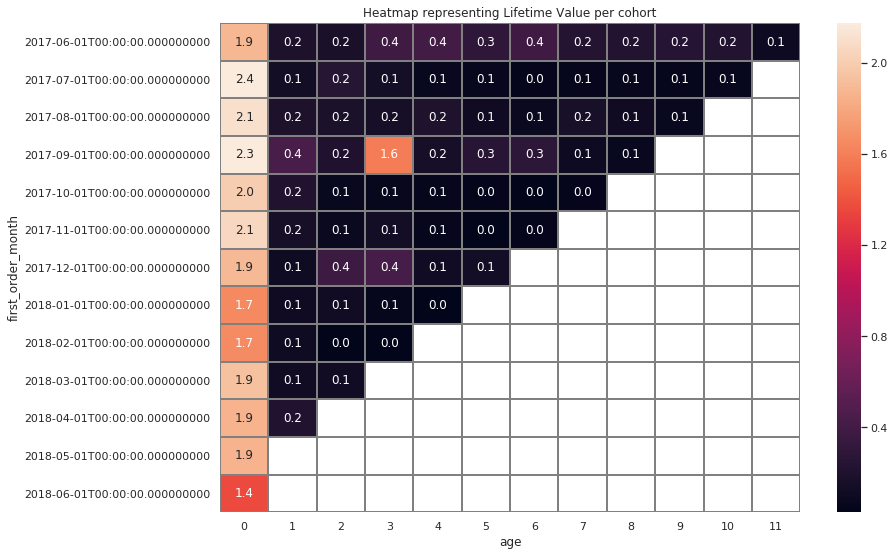

In [77]:
# plotting life time values on a heatmap
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Heatmap representing Lifetime Value per cohort')
sns.heatmap(output,annot=True, fmt='.1f', linewidths=1, linecolor='gray',robust=True); 

In [78]:
cum_ltv_pivot = output.cumsum(axis=1).round(2)
cum_ltv_pivot

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.89,2.08,2.26,2.64,3.05,3.34,3.72,3.96,4.18,4.42,4.65,4.75
2017-07-01,2.40,2.54,2.79,2.93,3.00,3.06,3.11,3.17,3.23,3.29,3.35,NaN
2017-08-01,2.11,2.30,2.48,2.64,2.84,2.95,3.03,3.20,3.31,3.39,NaN,NaN
2017-09-01,2.26,2.70,2.91,4.50,4.66,4.92,5.20,5.30,5.37,NaN,NaN,NaN
2017-10-01,2.00,2.22,2.29,2.36,2.42,2.46,2.50,2.54,NaN,NaN,NaN,NaN
2017-11-01,2.06,2.22,2.30,2.43,2.49,2.51,2.56,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.90,2.00,2.37,2.80,2.92,3.06,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.65,1.77,1.89,1.95,1.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.66,1.77,1.81,1.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


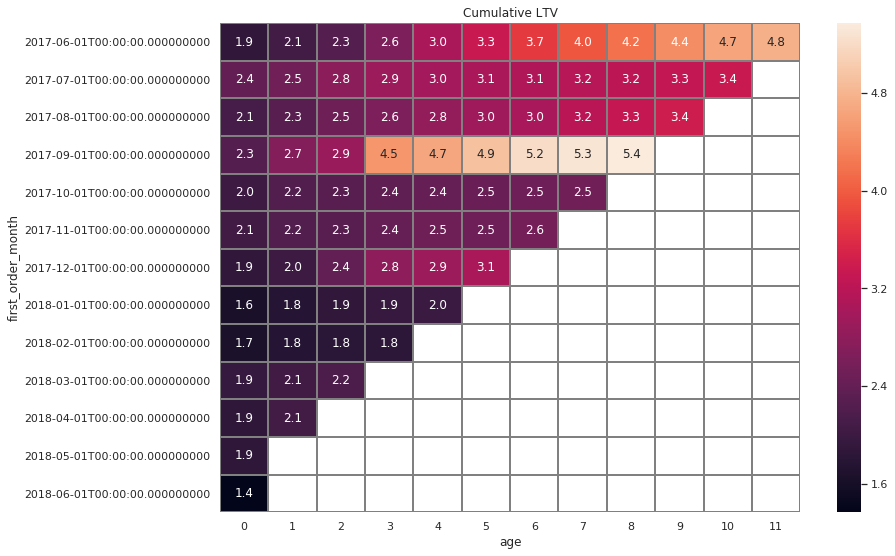

In [79]:
# build a heatmap
plt.figure(figsize=(13,9))
plt.title('Cumulative LTV')
ax = sns.heatmap(cum_ltv_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='gray')
b=ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

The LTV heatmap shows that the September and June cohorts have been much more profitable than other cohorts.

The highest LTV was in September till the month of September i.e., 5.4,
where as LTV in June cohort was also more when compared other cohorts except September being 4.8.

In [80]:
orders_log = orders_log.merge(visits_log, on='uid', how='left')
orders_log.head(10)

,buy ts,revenue,uid,order_date,order_week,order_month,first_login_date_x,first_login_month_x,cohort_lifetime_x,device,...,start ts,date,week,month,year,sess_length,first_login_date_y,first_login_month_y,login_month,cohort_lifetime_y
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,22,2017-06-01,2017-06-01,2017-06-01,0,desktop,...,2017-06-01 00:09:00,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2.0,2017-06-01,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,22,2017-06-01,2017-06-01,2017-06-01,0,desktop,...,2017-06-01 00:14:00,2017-06-01,2017-06-01,2017-06-01,2017-01-01,11.0,2017-06-01,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,22,2017-06-01,2017-06-01,2017-06-01,0,desktop,...,2017-06-01 00:25:00,2017-06-01,2017-06-01,2017-06-01,2017-01-01,9.0,2017-06-01,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,22,2017-06-01,2017-06-01,2017-06-01,0,desktop,...,2017-06-01 00:14:00,2017-06-01,2017-06-01,2017-06-01,2017-01-01,19.0,2017-06-01,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,22,2017-06-01,2017-06-01,2017-06-01,0,desktop,...,2017-06-01 07:31:00,2017-06-01,2017-06-01,2017-06-01,2017-01-01,28.0,2017-06-01,2017-06-01,2017-06-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761802,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,22,2018-05-01,2017-10-23,2017-10-01,7,desktop,...,2018-01-15 10:39:00,2018-01-15,2018-01-11,2018-01-01,2018-01-01,8.0,2017-10-23,2017-10-01,2018-01-01,3
761803,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,22,2018-05-01,2017-10-23,2017-10-01,7,desktop,...,2017-12-12 16:20:00,2017-12-12,2017-12-07,2017-12-01,2017-01-01,1.0,2017-10-23,2017-10-01,2017-12-01,2
761804,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,22,2018-05-01,2017-10-23,2017-10-01,7,desktop,...,2017-10-23 12:32:00,2017-10-23,2017-10-19,2017-10-01,2017-01-01,4.0,2017-10-23,2017-10-01,2017-10-01,0
761805,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,22,2018-05-01,2017-10-23,2017-10-01,7,desktop,...,2017-11-15 17:08:00,2017-11-15,2017-11-09,2017-11-01,2017-01-01,10.0,2017-10-23,2017-10-01,2017-11-01,1


In [81]:
# calculating total revenue per source
total_rev_source= orders_log.groupby(['source_id']).agg({'revenue':'sum'}) 
total_rev_source.rename(columns=({'revenue':'total_rev_source'}),inplace=True)
# # calculating total users per source
total_users_source = orders_log.groupby(['source_id']).agg({'uid':'count'})
total_users_source.rename(columns=({'uid':'total_users_source'}),inplace=True)


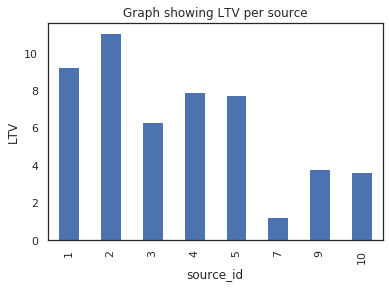

In [82]:
ltv_source = (total_rev_source['total_rev_source'] / total_users_source['total_users_source'])
ltv_source.plot.bar()
plt.title('Graph showing LTV per source')
plt.ylabel('LTV');


We can see in th egraph that clearly source 1 and source 2 have higher LTV values when compared to others.

where as source 7 has considerably low revenue earned and other sources performed normally.

#### Conclusion:

The the above sales analysis we can see that 

1. From the above graph we can see that maximum number of users have converted to depositors with in less than a week days i.e, almost 68.6% where as 13.5% people may or may not have converted back at all and vey few users ranging from 2.7 to 3.5 % were converted in 14 to 30 days

2. We can see that most of the orders were made during the first cohort has a highly skewed distribution.
That is with i na month of the login month which is about 33,994 orders were made . As the number of months keep increasing the number of orders placed are gradually decreasing i.e., from almost 4600 to 300 approximately.

3. On an average revenue is between 5 to 15 irrespective of the November sales:

4. The Life Time Values shows that the September cohort has been much more profitable than other cohorts, However there is no doubt in saying that users always come back the same month more in numer than in the later months.



### Money spent :

In [83]:
costs.head()


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [84]:
costs['month'] = costs['dt'].astype('datetime64[M]')
costs.head()

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [85]:
# total cost
print('Overall costs spent:', int(costs.costs.sum()))

Overall costs spent: 329131


In [86]:
# total cost by source
costs_per_source = costs.groupby('source_id')['costs'].sum().sort_values(ascending=False).reset_index()
#costs.groupby('source_id').sum().reset_index()
costs_per_source

,source_id,costs
0,3,141321.63
1,4,61073.60
2,5,51757.10
3,2,42806.04
4,1,20833.27
5,10,5822.49
6,9,5517.49


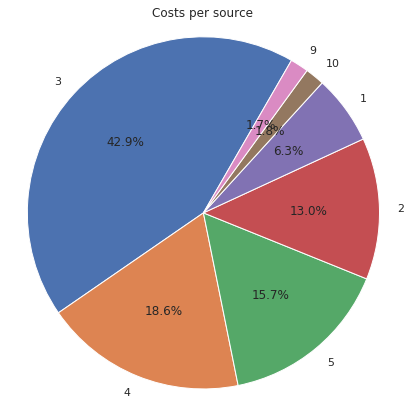

In [87]:
plt.figure(figsize=(7, 7))
labels = costs_per_source['source_id']
sizes = costs_per_source['costs']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=60)
plt.axis('equal')
plt.title('Costs per source')
plt.show()

In [88]:
# total costs per month per source
costs_source_month = costs.groupby(['month','source_id'])['costs'].sum()
costs_source_month.head()

month       source_id
2017-06-01  1            1125.61
            2            2427.38
            3            7731.65
            4            3514.80
            5            2616.12
Name: costs, dtype: float64

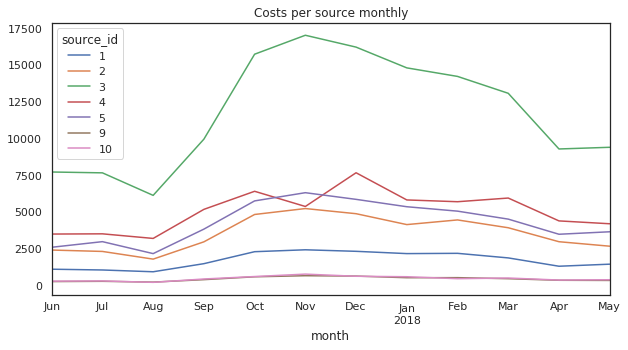

In [89]:
costs_source_month.unstack(level=1).plot(kind='line', figsize=(10,5), title='Costs per source monthly');

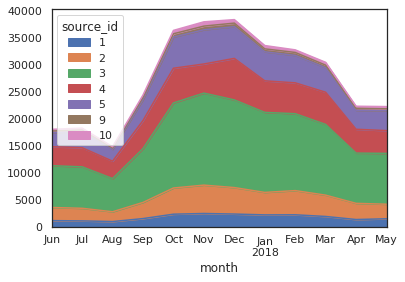

In [92]:
### Reviewer's code v3
costs_source_month.unstack(level=1).plot.area();

The highest invested source is source 3 which was about 141321 bucks. Then comes sources 4 and 5 with 61073 and 51757 respectively. 

We can see that maximum amount was spent in the month of November and clearly we did receive fruitful results for the investment.

### CAC & ROI:

In [90]:
# calculate monthly costs
monthly_costs = costs.groupby('month')['costs'].sum()
# add monthly costs to the cohort report
report_ = report.merge(monthly_costs,left_on='first_order_month', right_on='month')
# calculate CAC
report_['cac'] = report_['costs'] / report_['n_buyers']
report_.head(10)


,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,3822.996,0,1.889766,18015.00,8.905091
1,2017-06-01,2023,2017-07-01,981.82,392.728,1,0.194131,18015.00,8.905091
2,2017-06-01,2023,2017-08-01,885.34,354.136,2,0.175055,18015.00,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,772.520,3,0.381869,18015.00,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,827.432,4,0.409012,18015.00,8.905091
...,...,...,...,...,...,...,...,...,...
73,2018-03-01,3533,2018-04-01,1063.05,425.220,1,0.120357,30415.27,8.608907
74,2018-03-01,3533,2018-05-01,1114.87,445.948,2,0.126224,30415.27,8.608907
75,2018-04-01,2276,2018-04-01,10600.69,4240.276,0,1.863039,22289.38,9.793225
76,2018-04-01,2276,2018-05-01,1209.92,483.968,1,0.212640,22289.38,9.793225


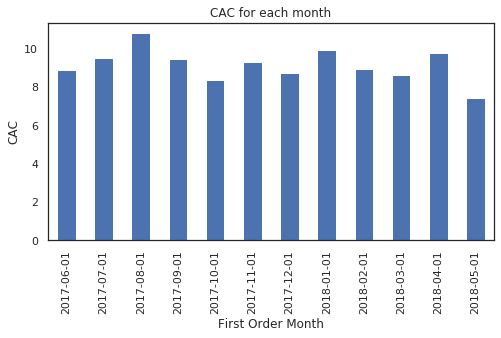

In [91]:
# grouping the CAC table by first_order_month and calculate the average of CAC for each month:
cac = report_.groupby('first_order_month').agg({'cac':'mean'}).round(2).reset_index().fillna('')
cac['first_order_month'] = cac['first_order_month'].dt.strftime('%Y-%m-%d')
#Let's plot a bar graph to show the trends of CAC per month:;
cac.plot(kind='bar',x = 'first_order_month', y = 'cac', legend=False, figsize=(8,4))
plt.title('CAC for each month')
plt.xlabel('First Order Month')
plt.ylabel('CAC')
plt.show()

In [92]:
# calculating total costs per source
costs_source = costs.pivot_table(index='source_id', values='costs', aggfunc='sum')
costs_source.reset_index()

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [93]:
# calculating number of users per source
users_source = visits_log.groupby('source_id').agg({'uid':'nunique'}).reset_index()
users_source.columns = ['source_id', 'n_users']
users_source.head()

,source_id,n_users
0,1,18999
1,2,26245
2,3,74756
3,4,83525
4,5,56974


In [94]:
money_spent = costs_source.merge(users_source, on='source_id')
money_spent.head()

,source_id,costs,n_users
0,1,20833.27,18999
1,2,42806.04,26245
2,3,141321.63,74756
3,4,61073.60,83525
4,5,51757.10,56974


In [95]:
money_spent['cost_per_user'] = money_spent['costs']/money_spent['n_users']
money_spent.reset_index()
money_spent['cost_per_user'] = money_spent['cost_per_user'].round(2)
money_spent.sort_values('n_users', ascending=False)
money_spent

,source_id,costs,n_users,cost_per_user
0,1,20833.27,18999,1.10
1,2,42806.04,26245,1.63
2,3,141321.63,74756,1.89
3,4,61073.60,83525,0.73
4,5,51757.10,56974,0.91
5,9,5517.49,9264,0.60
6,10,5822.49,8067,0.72


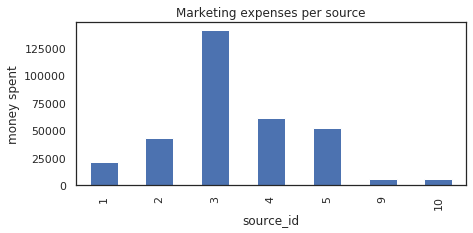

In [96]:
costs_source.plot(kind='bar', legend=False, figsize=(7,3))
plt.xlabel('source_id')
plt.ylabel('money spent')
plt.title('Marketing expenses per source')
plt.show()

WE can see that in terms of the CAC values the source 3 has been spent alot compared to other sources.

The highest CAC value was for the August 2017 which is almost 12, followed by Jan 2018 and April 2018 respectively.

In [97]:
# calculate ROMI
report_['romi'] = report_['ltv'] / report_['cac']
# form a new pivot table
output_romi = output = report_.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='romi', 
     aggfunc='mean')
cumsum_romi = output_romi.cumsum(axis=1).round(2)

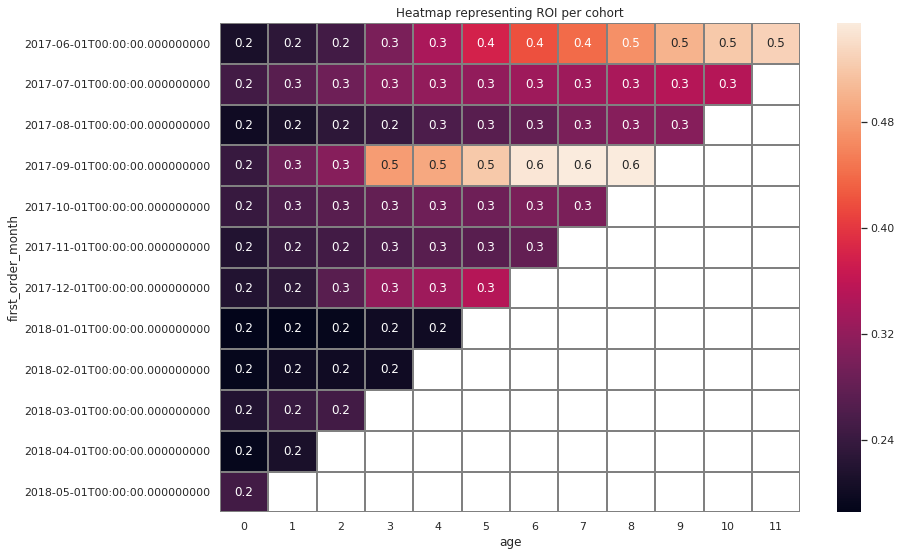

In [98]:
# plotting ROI values on a heatmap
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Heatmap representing ROI per cohort')
sns.heatmap(cumsum_romi,annot=True, fmt='.1f', linewidths=1, linecolor='gray',robust=True); 

Again , same scenario as LTV for the ROI. The September and June cohorts have been much more profitable when compared to other cohorts being 0.6 and 0.5 respectively. 

The 2018 year cohorts didn't do that well in terms of Return on Investment for the company being 0.3 each.

We can see that the source 1 and source 2 clearly had more return of investment rather than source 3 and source 4. Where as source 5 unfortunately had very disappointing return of investment

## Overview :

We have extracted three data sets for analysis which are named as visits_log , orders_log and costs.

The data has been optimized as follows:

The visits_log table has been reduced from a memory usage of 79.3MB to 11.3MB by changing the datatype of end ts,start ts to datetime64 and device to category as there are two devices that were been used.

The orders_log table has been reduced from a memory usage of 4.4MB to 1.2MB by changing the datatype of buy ts to datetime64.

The costs table has been reduced from a memory usage of 206.2 KB to 59.7 KB by changing the datatype of dt to datetime64.

After completing the product analysis we saw that on an average there are about 907 daily active users with almost 987 sessions per day which means that each user makes 1 - 1.5 sessions every day on the website.

The Average session length is about 1 minute which seems to be pretty reasonable if the user know which tickets to book for the event and corresponding time as per one's schedule.

We observed that maximum number of users and highest session lengths were reported in November month which may be due to the fact that users were so much attracted towards the Black Friday sales an wanted to grab all of the tickets so that they can enjoy during the christmas vacation time.

we can see that maximum number of users have converted to depositors with in less than a week days i.e, almost 68.6% where as 13.5% people may or may not have converted back at all and vey few users ranging from 2.7 to 3.5 % were converted in 14 to 30 days

We can see that most of the orders were made during the first cohort has a highly skewed distribution. That is with i na month of the login month which is about 33,994 orders were made . As the number of months keep increasing the number of orders placed are gradually decreasing i.e., from almost 4600 to 300 approximately.

On an average revenue is between 5 to 15 irrespective of the November sales:

The Life Time Values shows that the September cohort has been much more profitable than other cohorts, However there is no doubt in saying that users always come back the same month more in numer than in the later months.

From all the analysis done above it is evident that November month has been the most profitable month when compared to all other months because this may be due to the black friday sales or some oter clearance sales.

Where as coming to the sources we observe that source 1 and source 2 have proven to be more profitable than others sources and this can be proved by the metrics calculated like the life time value and the return of investment for these.

We've seen that some cohorts from source 2 are the most profitable, namely September and December cohorts so marketing should pay attention to promotion during this periods.

Based on conversion rate we've seen that desktop devices are more often used to make purchases (conversion rate almost 2 times higher compared to the conversion for touch devices). So we'd recommend to promote applications and marketing campaigns targeted to desktop users.

Based on per source analysis of LTV and ROMI it turns out that the most efficient marketing sources are source #1 and source 2, they pay off on average in the 4th month but for some cohorts even faster.

Based on cumulative LTV calculations I recommend to invest in source 1 & 2.